## Amazon Cell Phone Reviews: A Sentiment Analysis

Online reviews are the cornerstone of the online shopping experience, and are key in consumers' decision making process. As humans, we are able to easily read and discern whether or not online reviews are positive or negative. But can a computer do it? Using Amazon reviews of cell phones, we will attempt to answer this question. 

There are two files for this dataset: the list of cell phones with their overall ratings and total number of reviews, and the list of actual reviews. We will use the first dataset to look at some descriptive statistics, and the latter for sentiment analysis. Sentiment analysis will be performed with the use of a recurrent neural network. This type of neural network is good for sequences of data where the order is important (such as time, sentences, etc). 

Data source here: https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by examining the list of cell phone models with ratings.

In [2]:
phones = pd.read_csv('amazon-cell-phones-reviews/20191226-items.csv')
reviews = pd.read_csv('amazon-cell-phones-reviews/20191226-reviews.csv')

In [3]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [4]:
phones.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


There are 4 rows with null values in the brand column. Let's see what they are:

In [5]:
phones.loc[phones.brand.isna(),:]

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
144,B01EWKHIAI,NaN,Microsoft Lumia 950 32GB Dual Sim NAM RM-1118 ...,https://www.amazon.com/Microsoft-Lumia-RM-1118...,https://m.media-amazon.com/images/I/41y0iPJH27...,3.9,https://www.amazon.com/product-reviews/B01EWKHIAI,67,242.99,0.0
471,B07JHXX5YR,NaN,ROG Phone Gaming Smartphone ZS600KL-S845-8G512...,https://www.amazon.com/ROG-Phone-Gaming-Smartp...,https://m.media-amazon.com/images/I/81qwFH3PTC...,3.9,https://www.amazon.com/product-reviews/B07JHXX5YR,126,549.00,599.0
631,B07T3KMJW8,NaN,Redmi 7A 2+16Gb Black EU,https://www.amazon.com/Redmi-7A-16Gb-Black-EU/...,https://m.media-amazon.com/images/I/51s+1NLTqx...,3.8,https://www.amazon.com/product-reviews/B07T3KMJW8,5,99.99,0.0


After visiting the URLs in the reviewUrl column, we can easily fill these in:

In [6]:
phones.iloc[0,1]='Nokia'
phones.iloc[144,1]='Microsoft'
phones.iloc[471,1]='Asus'
phones.iloc[631,1]='Xiaomi'

In [7]:
#checking null values in brand column
phones.brand.isnull().sum()

0

We've filled in all the null values for the phones dataset. Let's look at the distribution of ratings across cell phone carriers.

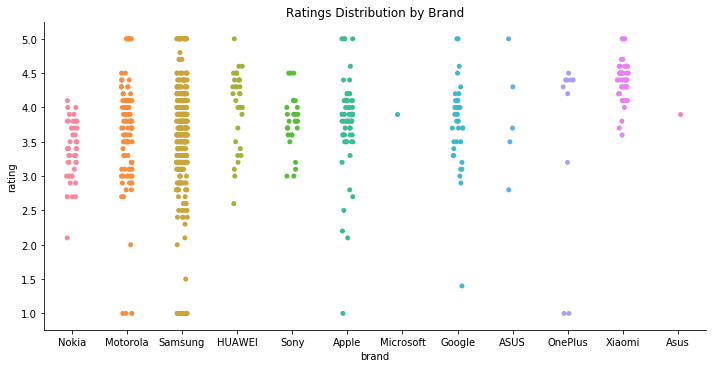

In [8]:
sns.catplot(x='brand',y='rating',data=phones, height=5, aspect=2)
plt.title('Ratings Distribution by Brand')
plt.show()

Based on the above graph, we can see that some manufacturers have phone models with a wider spread of ratings than others. Some manufacturers, such as Samsung, have phone reviews spanning all star ratings. Others, such as Google, have reviews which are typically above 3 stars. Among other factors, this may be related to the number of phones for each manufacturer in the dataset.

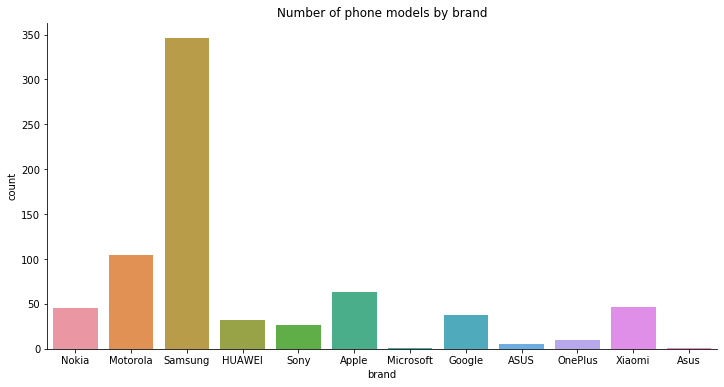

In [9]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(x='brand',data=phones, ax=ax)
sns.despine()
plt.title('Number of phone models by brand')
plt.show()

As expected, Samsung has the most phone models available in the dataset, far outpacing all other manufacturers. This partially explains the wide variety of ratings compared to other brands.

Now that we've taken a look at the phones, let's examine the reviews dataset.

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


We are the most interested in the reviews, which are in the "body" column. There are around 20 rows with missing values here. We will drop these values from the dataset.

In [11]:
reviews.dropna(subset=['body'],inplace=True)

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67965 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67965 non-null  object 
 1   name          67963 non-null  object 
 2   rating        67965 non-null  int64  
 3   date          67965 non-null  object 
 4   verified      67965 non-null  bool   
 5   title         67956 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27208 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.2+ MB


Now we can define our review classes. Based on domain knowledge, we know that Amazon reviews are rated from 1 to 5 stars, with 1 being the worst and 5 being the best. We will break these star ratings up into categories. These will be as follows:
1-2 stars: Bad, 
3 stars: Fair,
4 stars: Good
5 stars: Excellent

For the sake of running our model, these ratings will be coded as 0-Bad, 1-Fair, 2-Good, 3-Excellent. The ratings will be the column we are trying to predict.

In [12]:
def assign_cat(rating):
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    elif rating==4:
        return 2
    else:
        return 3

#applying above function to create categories
reviews['category']=reviews.rating.apply(lambda x: assign_cat(x))

Examining the category distribution:

In [13]:
reviews.category.value_counts()

3    37741
0    16651
2     8821
1     4752
Name: category, dtype: int64

Based on our categories, the dataset has a class imbalance. There are far more Excellent reviews than any other. We will have to account for this when we build our machine learning model by weighting the categories.

Now our dataset is ready for feature extraction (text processing). For this we'll use the Tokenizer class in Tensorflow to process our language data. This will consist of removing punctuation and separating out the text so that each word is a separate token. Then, we'll convert all tokens into a series of numbers that can be fed into the neural network.

Once we have the series of numbers, the data will be split into training and testing data. Then we can design the model and use it on the training set.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#create object of the Tokenizer class
tokens = Tokenizer()

#fit tokenizer on the reviews
tokens.fit_on_texts(reviews.body.values)
seq = tokens.texts_to_sequences(reviews.body.values)

#create a fixed length for each review
X = pad_sequences(seq, maxlen=350) 

In [15]:
from sklearn.model_selection import train_test_split

#setting target column
y = reviews.category.values

#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

#setting parameters for network
embed_dim = 200
batch_size = 64
ES = EarlyStopping(monitor='val_loss',patience=3)
vocab = len(tokens.word_index)+1
epochs = 10

#defining the weights to address class imbalance
weights = {0:2,1:8,2:4,3:1}

#defining the recurrent neural network model
model = Sequential()
model.add(Embedding(input_dim=vocab, output_dim=embed_dim, input_length=X.shape[1])) #check this
model.add(LSTM(100))
model.add(Dense(4, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 350, 200)          7672600   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 4)                 404       
Total params: 7,793,404
Trainable params: 7,793,404
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

#running the model
model.fit(X_train,y_train,validation_split=0.1,
         batch_size=batch_size,callbacks=[ES],class_weight=weights,epochs=epochs, shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 45875 samples, validate on 5098 samples
Epoch 1/10
45875/45875 [==============================] - 259s 6ms/sample - loss: 2.3350 - accuracy: 0.5849 - val_loss: 2.1004 - val_accuracy: 0.5991
Epoch 2/10
45875/45875 [==============================] - 258s 6ms/sample - loss: 2.0613 - accuracy: 0.6460 - val_loss: 2.0523 - val_accuracy: 0.6501
Epoch 3/10
45875/45875 [==============================] - 274s 6ms/sample - loss: 1.7433 - accuracy: 0.7043 - val_loss: 2.0640 - val_accuracy: 0.6214
Epoch 4/10
45875/45875 [==============================] - 278s 6ms/sample - loss: 1.5227 - accuracy: 0.7334 - val_loss: 2.2377 - val_accuracy: 0.6707
Epoch 5/10
45875/45875 [==============================] - 288s 6ms/sample - loss: 1.3243 - accuracy: 0.7648 - val_loss: 2.4289 - val_accuracy: 0.6559


From the above data, the model stopped at 4 epochs due to increasing validation loss. The model finished running with an overall accuracy of about 64% on the validation set. However, we have 4 categories, so we have to break this out to understand how the model really performed.

In [18]:
from sklearn.metrics import classification_report

#make predictions with test set
y_pred = np.argmax(model.predict(X_test), axis=1)

#print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4151
           1       0.22      0.42      0.29      1175
           2       0.27      0.38      0.32      2176
           3       0.87      0.71      0.78      9490

    accuracy                           0.66     16992
   macro avg       0.54      0.57      0.54     16992
weighted avg       0.73      0.66      0.69     16992



Based on the above classification report, the model had the easiest time classifying the sentiment of Bad and Excellent reviews, but had a much harder time with Fair and Good reviews. For Fair and Good predictions, the accuracy was a little higher than picking a class at random. 

If we were to run this model again, it would be interesting to change the categories to see if that has any effect on model accuracy. We suspect that the model would be fairly accurate in predicting positive reviews if we grouped 4 and 5 star reviews together. Also that the same would hold true for grouping Bad and Fair reviews as negative. Another idea for a similar project would be to try and predict the actual star rating based on sentiment.